In [1]:
# follow output from every line 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib notebook 
import seaborn as sns

In [43]:
# Question - Analyze the advanved stat win share and find what box stat contribu†es most to this stat 

In [2]:
# all data is coming from basketball-reference (https://www.basketball-reference.com)

In [47]:
# Win share is found by adding a players offensive rating with defensive rating 
# offensive rating is points generated divided by possession total x 100 
# defensive rating is team defensive rating [100 x Opp Pts/Opp Sc Poss] x (1-stop%) - team defensive rating]
# a players offensive rating is typically higher than defensive

In [3]:
# player level data 
nba_stats_2021_22 = pd.read_csv("data-nba/nba_player_stats_2021_22.csv")
nba_stats_2020_21 = pd.read_csv("data-nba/nba_player_stats_2020_21.csv")
nba_stats_2019_20 = pd.read_csv("data-nba/nba_player_stats_2019_20.csv")
nba_stats_2018_19 = pd.read_csv("data-nba/nba_player_stats_2018_19.csv")
nba_stats_2017_18 = pd.read_csv("data-nba/nba_player_stats_2017_18.csv")
nba_stats_2016_17 = pd.read_csv("data-nba/nba_player_stats_2016_17.csv")
nba_stats_2015_16 = pd.read_csv("data-nba/nba_player_stats_2015_16.csv")
nba_stats_2014_15 = pd.read_csv("data-nba/nba_player_stats_2014_15.csv")
nba_stats_2013_14 = pd.read_csv("data-nba/nba_player_stats_2013_14.csv")
nba_stats_2012_13 = pd.read_csv("data-nba/nba_player_stats_2012_13.csv")

In [4]:
# adding a season column 
nba_stats_2021_22["Season"] = "2021-22"
nba_stats_2020_21["Season"] = "2020-21"
nba_stats_2019_20["Season"] = "2019-20"
nba_stats_2018_19["Season"] = "2018-19"
nba_stats_2017_18["Season"] = "2017-18"
nba_stats_2016_17["Season"] = "2016-17"
nba_stats_2015_16["Season"] = "2015-16"
nba_stats_2014_15["Season"] = "2014-15"
nba_stats_2013_14["Season"] = "2013-14"
nba_stats_2012_13["Season"] = "2012-13"

In [5]:
# joining the data 
nba_player_stats = pd.concat([nba_stats_2021_22,nba_stats_2020_21,nba_stats_2019_20,nba_stats_2018_19,nba_stats_2017_18,nba_stats_2016_17,nba_stats_2015_16,nba_stats_2014_15,nba_stats_2013_14,nba_stats_2012_13], ignore_index = True)
nba_player_stats

Rk                 Player Pos  Age   Tm   G  GS    MP    FG   FGA  ...  \
0       1            Joel Embiid   C   27  PHI  68  68  33.8   9.8  19.6  ...   
1       2  Giannis Antetokounmpo  PF   27  MIL  67  67  32.9  10.3  18.6  ...   
2       3            Luka Dončić  PG   22  DAL  65  65  35.4   9.9  21.6  ...   
3       4             Trae Young  PG   23  ATL  76  76  34.9   9.4  20.3  ...   
4       5          DeMar DeRozan  PF   32  CHI  76  76  36.1  10.2  20.2  ...   
...   ...                    ...  ..  ...  ...  ..  ..   ...   ...   ...  ...   
2487  179         Pablo Prigioni  PG   35  NYK  78  18  16.2   1.3   2.8  ...   
2488  180          Dahntay Jones  SF   32  TOT  78  19  13.0   1.1   2.8  ...   
2489  181         Draymond Green  SF   22  GSW  79   1  13.4   1.1   3.3  ...   
2490  182            Chuck Hayes   C   29  SAC  74   1  16.3   1.1   2.6  ...   
2491  183           Festus Ezeli   C   23  GSW  78  41  14.4   0.9   2.2  ...   

      DRB   TRB  AST  STL  BLK  TOV   PF   PTS  Player-additional   Season  
0     9.6  11.7  4.2  1.1  1.5  3.1  2.7  30.6          embiijo01  2021-22  
1     9.6  11.6  5.8  1.1  1.4  3.3  3.2  29.9          antetgi01  2021-22  
2     8.3   9.1  8.7  1.2  0.6  4.5  2.2  28.4          doncilu01  2021-22  
3     3.1   3.7  9.7  0.9  0.1  4.0  1.7  28.4          youngtr01  2021-22  
4     4.4   5.2  4.9  0.9  0.3  2.4  2.3  27.9          derozde01  2021-22  
...   ...   ...  ...  ...  ...  ...  ...   ...                ...      ...  
2487  1.3   1.8  3.0  0.9  0.0  1.1  1.6   3.5          prigipa01  2012-13  
2488  1.0   1.3  0.6  0.3  0.1  0.5  1.5   3.4          jonesda02  2012-13  
2489  2.6   3.3  0.7  0.5  0.3  0.6  2.0   2.9          greendr01  2012-13  
2490  2.5   4.0  1.5  0.4  0.2  0.6  1.5   2.7          hayesch01  2012-13  
2491  2.2   4.0  0.3  0.3  0.9  0.8  2.0   2.4          ezelife01  2012-13  

[2492 rows x 32 columns]

In [6]:
# advanced level data 
nba_advanced_2021_22 = pd.read_csv("data-nba/nba_advance_2021_22.csv")
nba_advanced_2020_21 = pd.read_csv("data-nba/nba_advance_2020_21.csv")
nba_advanced_2019_20 = pd.read_csv("data-nba/nba_advance_2019_20.csv")
nba_advanced_2018_19 = pd.read_csv("data-nba/nba_advance_2018_19.csv")
nba_advanced_2017_18 = pd.read_csv("data-nba/nba_advance_2017_18.csv")
nba_advanced_2016_17 = pd.read_csv("data-nba/nba_advance_2016_17.csv")
nba_advanced_2015_16 = pd.read_csv("data-nba/nba_advance_2015_16.csv")
nba_advanced_2014_15 = pd.read_csv("data-nba/nba_advance_2014_15.csv")
nba_advanced_2013_14 = pd.read_csv("data-nba/nba_advance_2013_14.csv")
nba_advanced_2012_13 = pd.read_csv("data-nba/nba_advance_2012_13.csv")

In [7]:
# adding season column 
nba_advanced_2021_22["Season"] = "2021-22"
nba_advanced_2020_21["Season"] = "2020-21"
nba_advanced_2019_20["Season"] = "2019-20"
nba_advanced_2018_19["Season"] = "2018-19"
nba_advanced_2017_18["Season"] = "2017-18"
nba_advanced_2016_17["Season"] = "2016-17"
nba_advanced_2015_16["Season"] = "2015-16"
nba_advanced_2014_15["Season"] = "2014-15"
nba_advanced_2013_14["Season"] = "2013-14"
nba_advanced_2012_13["Season"] = "2012-13"

In [9]:
# joining data 
nba_advanced_stats = pd.concat([nba_advanced_2021_22,nba_advanced_2020_21,nba_advanced_2019_20,nba_advanced_2018_19,nba_advanced_2017_18,nba_advanced_2016_17,nba_advanced_2015_16,nba_advanced_2014_15,nba_advanced_2013_14,nba_advanced_2012_13], ignore_index = True)
nba_advanced_stats

Rk                 Player Pos  Age   Tm   G    MP   PER    TS%   3PAr  \
0       1           Nikola Jokić   C   26  DEN  74  2476  32.8  0.661  0.220   
1       2  Giannis Antetokounmpo  PF   27  MIL  67  2204  32.1  0.633  0.194   
2       3            Joel Embiid   C   27  PHI  68  2297  31.2  0.616  0.188   
3       4            Rudy Gobert   C   29  UTA  66  2120  24.7  0.732  0.008   
4       5     Karl-Anthony Towns   C   26  MIN  74  2476  24.1  0.640  0.301   
...   ...                    ...  ..  ...  ...  ..   ...   ...    ...    ...   
5144  465          Hedo Türkoğlu  SF   33  ORL  11   189   3.4  0.288  0.453   
5145  466             Ben Gordon  SG   29  CHA  75  1560  12.7  0.515  0.384   
5146  467          Terrel Harris  SG   25  TOT  20   137  -3.8  0.239  0.296   
5147  468          Austin Rivers  SG   20  NOH  61  1418   5.9  0.431  0.221   
5148  469        Michael Beasley  SF   24  PHO  75  1554  10.8  0.462  0.188   

      ...   OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP  Player-additional  \
0     ...  10.8  4.5  15.2  0.296   9.2   4.5  13.7   9.8          jokicni01   
1     ...   9.2  3.7  12.9  0.281   7.6   3.5  11.2   7.4          antetgi01   
2     ...   7.9  4.1  12.0  0.252   7.2   2.0   9.2   6.5          embiijo01   
3     ...   7.3  4.3  11.7  0.264   2.9   1.7   4.6   3.6          goberru01   
4     ...   7.1  3.2  10.3  0.199   4.5   0.5   5.0   4.4          townska01   
...   ...   ...  ...   ...    ...   ...   ...   ...   ...                ...   
5144  ...  -0.6  0.1  -0.5 -0.116  -7.5  -0.7  -8.2  -0.3          turkohe01   
5145  ...  -0.4 -0.2  -0.6 -0.018  -0.2  -3.2  -3.4  -0.6          gordobe01   
5146  ...  -0.7  0.1  -0.6 -0.219 -11.1  -1.5 -12.6  -0.4          harrite01   
5147  ...  -1.2  0.1  -1.1 -0.038  -4.7  -1.6  -6.2  -1.5          riverau01   
5148  ...  -2.5  1.0  -1.5 -0.047  -2.7  -2.0  -4.7  -1.1          beaslmi01   

       Season  
0     2021-22  
1     2021-22  
2     2021-22  
3     2021-22  
4     2021-22  
...       ...  
5144  2012-13  
5145  2012-13  
5146  2012-13  
5147  2012-13  
5148  2012-13  

[5149 rows x 29 columns]

In [10]:
# joining player level data and advanced level data 
stat_table = pd.merge(nba_player_stats,nba_advanced_stats, on = ["Player","Season"])
stat_table

Rk_x                 Player Pos_x  Age_x Tm_x  G_x  GS  MP_x    FG  \
0        1            Joel Embiid     C     27  PHI   68  68  33.8   9.8   
1        2  Giannis Antetokounmpo    PF     27  MIL   67  67  32.9  10.3   
2        3            Luka Dončić    PG     22  DAL   65  65  35.4   9.9   
3        4             Trae Young    PG     23  ATL   76  76  34.9   9.4   
4        5          DeMar DeRozan    PF     32  CHI   76  76  36.1  10.2   
...    ...                    ...   ...    ...  ...  ...  ..   ...   ...   
2487   179         Pablo Prigioni    PG     35  NYK   78  18  16.2   1.3   
2488   180          Dahntay Jones    SF     32  TOT   78  19  13.0   1.1   
2489   181         Draymond Green    SF     22  GSW   79   1  13.4   1.1   
2490   182            Chuck Hayes     C     29  SAC   74   1  16.3   1.1   
2491   183           Festus Ezeli     C     23  GSW   78  41  14.4   0.9   

       FGA  ...  USG%  OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP  \
0     19.6  ...  37.2  7.9  4.1  12.0  0.252   7.2   2.0   9.2   6.5   
1     18.6  ...  34.9  9.2  3.7  12.9  0.281   7.6   3.5  11.2   7.4   
2     21.6  ...  37.4  3.8  3.8   7.6  0.159   6.4   1.8   8.2   5.9   
3     20.3  ...  34.4  9.0  1.0  10.0  0.181   7.1  -2.0   5.2   4.8   
4     20.2  ...  31.8  7.0  1.8   8.8  0.154   3.4  -0.9   2.5   3.1   
...    ...  ...   ...  ...  ...   ...    ...   ...   ...   ...   ...   
2487   2.8  ...  11.7  2.0  1.3   3.2  0.123  -0.8   0.9   0.1   0.7   
2488   2.8  ...  14.0  0.0  0.6   0.6  0.026  -4.9  -0.6  -5.5  -0.9   
2489   3.3  ...  14.0 -0.9  1.6   0.6  0.028  -5.0   1.4  -3.6  -0.4   
2490   2.6  ...   9.4  1.1  0.4   1.5  0.060  -1.2  -0.2  -1.4   0.2   
2491   2.2  ...  10.7  0.0  1.5   1.5  0.066  -4.0   0.7  -3.4  -0.4   

      Player-additional_y  
0               embiijo01  
1               antetgi01  
2               doncilu01  
3               youngtr01  
4               derozde01  
...                   ...  
2487            prigipa01  
2488            jonesda02  
2489            greendr01  
2490            hayesch01  
2491            ezelife01  

[2492 rows x 59 columns]

In [11]:
# NBA standings 
standings_22 = pd.read_csv("data-nba/standings_2021_22.csv")
standings_21 = pd.read_csv("data-nba/standing_2020_21.csv")
standings_20 = pd.read_csv("data-nba/standings_2019_20.csv") 
standings_19 = pd.read_csv("data-nba/standings_2018_19.csv")
standings_18 = pd.read_csv("data-nba/standings_2017_18.csv")
standings_17 = pd.read_csv("data-nba/standings_2016_17.csv")
standings_16 = pd.read_csv("data-nba/standings_2015_16.csv")
standings_15 = pd.read_csv("data-nba/standings_2014_15.csv")
standings_14 = pd.read_csv("data-nba/standings_2013_14.csv")
standings_13 = pd.read_csv("data-nba/standings_2012_13.csv")

In [12]:
# adding season column 
standings_22["Season"] = "2021-22"
standings_21["Season"] = "2020-21"
standings_20["Season"] = "2019-20"
standings_19["Season"] = "2018-19"
standings_18["Season"] = "2017-18"
standings_17["Season"] = "2016-17"
standings_16["Season"] = "2015-16"
standings_15["Season"] = "2014-15"
standings_14["Season"] = "2013-14"
standings_13["Season"] = "2012-13"

In [13]:
# standings for the last 10 seasons 
all_standings = pd.concat([standings_22,standings_21,standings_20,standings_19,standings_18,standings_17,standings_16,standings_15,standings_14,standings_13])
all_standings

Tm   W   L   W/L%    GB   PS/G   PA/G   SRS   Season
0            Miami Heat  53  29  0.646   NaN  110.0  105.6  4.23  2021-22
1        Boston Celtics  51  31  0.622   2.0  111.8  104.5  7.02  2021-22
2       Milwaukee Bucks  51  31  0.622   2.0  115.5  112.1  3.22  2021-22
3    Philadelphia 76ers  51  31  0.622   2.0  109.9  107.3  2.57  2021-22
4       Toronto Raptors  48  34  0.585   5.0  109.4  107.1  2.38  2021-22
..                  ...  ..  ..    ...   ...    ...    ...   ...      ...
25    San Antonio Spurs  58  24  0.707   NaN  103.0   96.6  6.67  2012-13
26    Memphis Grizzlies  56  26  0.683   2.0   93.4   89.3  4.32  2012-13
27      Houston Rockets  45  37  0.549  13.0  106.0  102.5  3.69  2012-13
28     Dallas Mavericks  41  41  0.500  17.0  101.1  101.7 -0.24  2012-13
29  New Orleans Hornets  27  55  0.329  31.0   94.1   97.9 -3.12  2012-13

[300 rows x 9 columns]

In [14]:
# replacing repeated names 
all_standings["Tm"] = all_standings["Tm"].replace("Charlotte Bobcats", "Charlotte Hornets")
all_standings["Tm"] = all_standings["Tm"].replace("New Orleans Hornets", "New Orleans Pelicans")
print(all_standings)

                      Tm   W   L   W/L%    GB   PS/G   PA/G   SRS   Season
0             Miami Heat  53  29  0.646   NaN  110.0  105.6  4.23  2021-22
1         Boston Celtics  51  31  0.622   2.0  111.8  104.5  7.02  2021-22
2        Milwaukee Bucks  51  31  0.622   2.0  115.5  112.1  3.22  2021-22
3     Philadelphia 76ers  51  31  0.622   2.0  109.9  107.3  2.57  2021-22
4        Toronto Raptors  48  34  0.585   5.0  109.4  107.1  2.38  2021-22
..                   ...  ..  ..    ...   ...    ...    ...   ...      ...
25     San Antonio Spurs  58  24  0.707   NaN  103.0   96.6  6.67  2012-13
26     Memphis Grizzlies  56  26  0.683   2.0   93.4   89.3  4.32  2012-13
27       Houston Rockets  45  37  0.549  13.0  106.0  102.5  3.69  2012-13
28      Dallas Mavericks  41  41  0.500  17.0  101.1  101.7 -0.24  2012-13
29  New Orleans Pelicans  27  55  0.329  31.0   94.1   97.9 -3.12  2012-13

[300 rows x 9 columns]


In [15]:
# grouping total wins 
team_wins = all_standings[["Tm","W"]].groupby("Tm").sum()
team_wins

W
Tm                         
Atlanta Hawks           390
Boston Celtics          446
Brooklyn Nets           369
Charlotte Hornets       355
Chicago Bulls           374
Cleveland Cavaliers     372
Dallas Mavericks        409
Denver Nuggets          437
Detroit Pistons         314
Golden State Warriors   527
Houston Rockets         450
Indiana Pacers          430
Los Angeles Clippers    501
Los Angeles Lakers      335
Memphis Grizzlies       429
Miami Heat              466
Milwaukee Bucks         426
Minnesota Timberwolves  318
New Orleans Pelicans    348
New York Knicks         316
Oklahoma City Thunder   453
Orlando Magic           275
Philadelphia 76ers      355
Phoenix Suns            348
Portland Trail Blazers  429
Sacramento Kings        308
San Antonio Spurs       497
Toronto Raptors         483
Utah Jazz               440
Washington Wizards      378

In [16]:
# team average win share 
team_ws = stat_table[["Tm_x","WS"]].groupby("Tm_x").mean()
team_ws

WS
Tm_x          
ATL   4.129167
BOS   4.606250
BRK   3.576712
CHA   3.384615
CHI   3.885135
CHO   3.798437
CLE   4.214754
DAL   4.131250
DEN   4.524051
DET   3.595588
GSW   4.889362
HOU   5.622222
IND   4.521519
LAC   5.086905
LAL   3.317143
MEM   4.210000
MIA   4.794667
MIL   4.655263
MIN   3.627778
NOH   4.240000
NOP   3.680303
NYK   3.247222
OKC   4.851282
ORL   3.004348
PHI   3.568571
PHO   3.743836
POR   4.671622
SAC   3.136620
SAS   4.452632
TOR   5.246667
TOT   2.803239
UTA   4.684524
WAS   4.210606

<IPython.core.display.Javascript object>


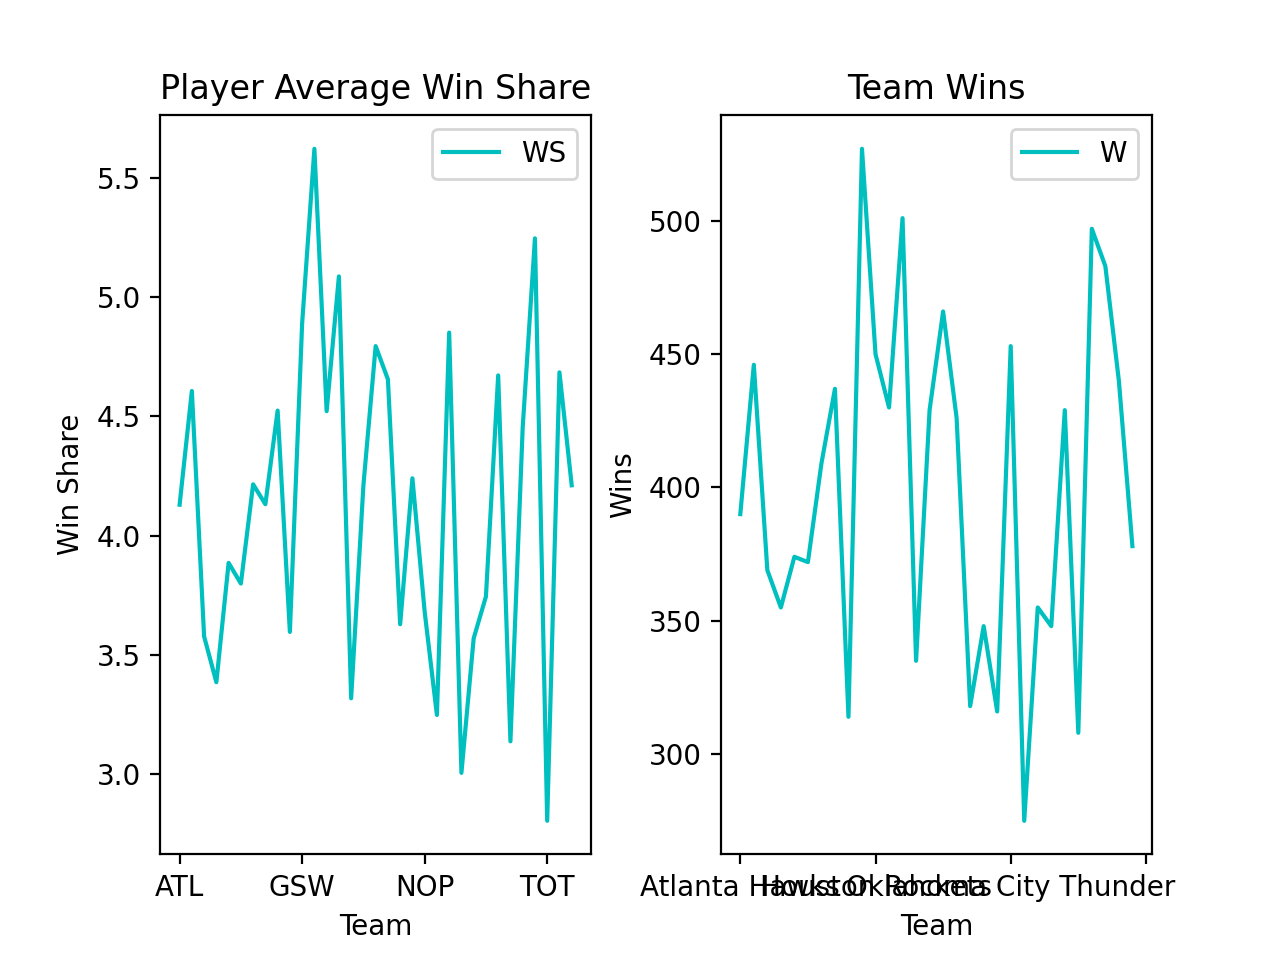

Text(0.5, 1.0, 'Player Average Win Share')

Text(0.5, 1.0, 'Team Wins')

Text(0.5, 0, 'Team')

Text(0.5, 0, 'Team')

Text(0, 0.5, 'Win Share')

Text(0, 0.5, 'Wins')

In [18]:
# shows the relationship between teams average win share 
fig, axes = plt.subplots (1,2)
ax8 = team_ws.plot(ax = axes[0], color = "c")
ax9 = team_wins.plot(ax = axes[1], color = "c")
ax8.set_title("Player Average Win Share")
ax9.set_title("Team Wins")
ax8.set_xlabel("Team")
ax9.set_xlabel("Team")
ax8.set_ylabel("Win Share")
ax9.set_ylabel("Wins")
fig.subplots_adjust(wspace=.3, hspace= .1)

In [19]:
# MVP season and stats 
lj = stat_table[stat_table.Player == "LeBron James"]
mvp_2013 = lj[lj.Season == "2012-13"]
kd = stat_table[stat_table.Player == "Kevin Durant"]
mvp_14 = kd[kd.Season == "2013-14"]
sc = stat_table[stat_table.Player == "Stephen Curry"]
mvp_15 = sc[sc.Season == "2014-15"]
mvp_16 = sc[sc.Season == "2015-16"]
rw = stat_table[stat_table.Player == "Russell Westbrook"]
mvp_17 = rw[rw.Season == "2016-17"]
jh = stat_table[stat_table.Player == "James Harden"]
mvp_18 = jh[jh.Season == "2017-18"]
ga = stat_table[stat_table.Player == "Giannis Antetokounmpo"]
mvp_19 = ga[ga.Season == "2018-19"]
mvp_20 = ga[ga.Season == "2019-20"]
nj = stat_table[stat_table.Player == "Nikola Jokić"]
mvp_21 = nj[nj.Season == "2020-21"]
mvp_22 = nj[nj.Season == "2021-22"]

In [21]:
# MVP season and stat table  
mvp_seasons = pd.concat([mvp_2013,mvp_14,mvp_15,mvp_16,mvp_17,mvp_18,mvp_19,mvp_20,mvp_21,mvp_22])
mvp_seasons

Rk_x                 Player Pos_x  Age_x Tm_x  G_x  GS  MP_x    FG  \
2312     4           LeBron James    PF     28  MIA   76  76  37.9  10.1   
2050     1           Kevin Durant    SF     25  OKC   81  81  38.5  10.5   
1788     6          Stephen Curry    PG     26  GSW   80  80  32.7   8.2   
1512     1          Stephen Curry    PG     27  GSW   79  79  34.2  10.2   
1241     1      Russell Westbrook    PG     28  OKC   81  81  34.6  10.2   
982      1           James Harden    SG     28  HOU   72  72  35.4   9.0   
726      3  Giannis Antetokounmpo    PF     24  MIL   72  72  32.8  10.0   
469      5  Giannis Antetokounmpo    PF     25  MIL   63  63  30.4  10.9   
237     10           Nikola Jokić     C     25  DEN   72  72  34.6  10.2   
5        6           Nikola Jokić     C     26  DEN   74  74  33.5  10.3   

       FGA  ...  USG%   OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP  \
2312  17.8  ...  30.2  14.6  4.7  19.3  0.322   9.3   2.4  11.7   9.9   
2050  20.8  ...  33.0  14.8  4.4  19.2  0.295   8.8   1.4  10.2   9.6   
1788  16.8  ...  28.9  11.5  4.1  15.7  0.288   8.2   1.7   9.9   7.9   
1512  20.2  ...  32.6  13.8  4.1  17.9  0.318  10.3   1.6  11.9   9.5   
1241  24.0  ...  41.7   8.5  4.6  13.1  0.224   8.7   2.4  11.1   9.3   
982   20.1  ...  36.1  11.6  3.8  15.4  0.289   8.5   1.4   9.9   7.7   
726   17.3  ...  32.3   8.9  5.5  14.4  0.292   6.3   4.1  10.4   7.4   
469   19.7  ...  37.5   6.1  5.0  11.1  0.279   7.4   4.1  11.5   6.6   
237   18.0  ...  29.6  12.2  3.4  15.6  0.301   9.1   3.0  12.1   8.8   
5     17.7  ...  31.9  10.8  4.5  15.2  0.296   9.2   4.5  13.7   9.8   

      Player-additional_y  
2312            jamesle01  
2050            duranke01  
1788            curryst01  
1512            curryst01  
1241            westbru01  
982             hardeja01  
726             antetgi01  
469             antetgi01  
237             jokicni01  
5               jokicni01  

[10 rows x 59 columns]

In [22]:
# league leaders in win share 
ws_22 = nj[nj.Season == "2021-22"]
ws_21 = nj[nj.Season == "2020-21"]
ws_20 = jh[jh.Season == "2019-20"]
ws_19 = jh[jh.Season == "2018-19"]
ws_18 = jh[jh.Season == "2017-18"]
ws_17 = jh[jh.Season == "2016-17"]
ws_16 = sc[sc.Season == "2015-16"]
ws_15 = jh[jh.Season == "2014-15"]
ws_14 = kd[kd.Season == "2013-14"]
ws_13 = lj[lj.Season == "2012-13"]

In [23]:
# league leader table 
ws_table = pd.concat([ws_22,ws_21,ws_20,ws_19,ws_18,ws_17,ws_16,ws_15,ws_14,ws_13])
ws_table

Rk_x         Player Pos_x  Age_x Tm_x  G_x  GS  MP_x    FG   FGA  ...  \
5        6   Nikola Jokić     C     26  DEN   74  74  33.5  10.3  17.7  ...   
237     10   Nikola Jokić     C     25  DEN   72  72  34.6  10.2  18.0  ...   
465      1   James Harden    SG     30  HOU   68  68  36.5   9.9  22.3  ...   
724      1   James Harden    PG     29  HOU   78  78  36.8  10.8  24.5  ...   
982      1   James Harden    SG     28  HOU   72  72  35.4   9.0  20.1  ...   
1242     2   James Harden    PG     27  HOU   81  81  36.4   8.3  18.9  ...   
1512     1  Stephen Curry    PG     27  GSW   79  79  34.2  10.2  20.2  ...   
1784     2   James Harden    SG     25  HOU   81  81  36.8   8.0  18.1  ...   
2050     1   Kevin Durant    SF     25  OKC   81  81  38.5  10.5  20.8  ...   
2312     4   LeBron James    PF     28  MIA   76  76  37.9  10.1  17.8  ...   

      USG%   OWS  DWS    WS  WS/48  OBPM  DBPM   BPM  VORP  \
5     31.9  10.8  4.5  15.2  0.296   9.2   4.5  13.7   9.8   
237   29.6  12.2  3.4  15.6  0.301   9.1   3.0  12.1   8.8   
465   36.3   9.9  3.2  13.1  0.254   8.1   1.6   9.6   7.3   
724   40.5  11.4  3.8  15.2  0.254   9.4   1.6  11.0   9.3   
982   36.1  11.6  3.8  15.4  0.289   8.5   1.4   9.9   7.7   
1242  34.2  11.5  3.6  15.0  0.245   7.5   1.2   8.7   8.0   
1512  32.6  13.8  4.1  17.9  0.318  10.3   1.6  11.9   9.5   
1784  31.3  12.2  4.2  16.4  0.265   7.0   1.8   8.8   8.1   
2050  33.0  14.8  4.4  19.2  0.295   8.8   1.4  10.2   9.6   
2312  30.2  14.6  4.7  19.3  0.322   9.3   2.4  11.7   9.9   

      Player-additional_y  
5               jokicni01  
237             jokicni01  
465             hardeja01  
724             hardeja01  
982             hardeja01  
1242            hardeja01  
1512            curryst01  
1784            hardeja01  
2050            duranke01  
2312            jamesle01  

[10 rows x 59 columns]

In [26]:
# added a column to each table and joined the two 
mvp_ws = mvp_seasons[["Player","WS","Season"]]
mvp_ws["Category"] = "MVP"
ws_leaders = ws_table[["Player","WS","Season"]]
ws_leaders["Category"] = "League Leader"
leaders_mvps = pd.merge(ws_leaders,mvp_ws, on = ["Season"])
leaders_mvps

/var/folders/pp/g2tcw6c17wv42p4jbr36djzh0000gn/T/ipykernel_46816/3902496845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvp_ws["Category"] = "MVP"
/var/folders/pp/g2tcw6c17wv42p4jbr36djzh0000gn/T/ipykernel_46816/3902496845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ws_leaders["Category"] = "League Leader"


Player_x  WS_x   Season     Category_x               Player_y  WS_y  \
0   Nikola Jokić  15.2  2021-22  League Leader           Nikola Jokić  15.2   
1   Nikola Jokić  15.6  2020-21  League Leader           Nikola Jokić  15.6   
2   James Harden  13.1  2019-20  League Leader  Giannis Antetokounmpo  11.1   
3   James Harden  15.2  2018-19  League Leader  Giannis Antetokounmpo  14.4   
4   James Harden  15.4  2017-18  League Leader           James Harden  15.4   
5   James Harden  15.0  2016-17  League Leader      Russell Westbrook  13.1   
6  Stephen Curry  17.9  2015-16  League Leader          Stephen Curry  17.9   
7   James Harden  16.4  2014-15  League Leader          Stephen Curry  15.7   
8   Kevin Durant  19.2  2013-14  League Leader           Kevin Durant  19.2   
9   LeBron James  19.3  2012-13  League Leader           LeBron James  19.3   

  Category_y  
0        MVP  
1        MVP  
2        MVP  
3        MVP  
4        MVP  
5        MVP  
6        MVP  
7        MVP  
8        MVP  
9        MVP

In [27]:
# set the season as the index
leaders_mvps.index = [leaders_mvps.Season]
leaders_mvps

Player_x  WS_x   Season     Category_x               Player_y  \
Season                                                                        
2021-22   Nikola Jokić  15.2  2021-22  League Leader           Nikola Jokić   
2020-21   Nikola Jokić  15.6  2020-21  League Leader           Nikola Jokić   
2019-20   James Harden  13.1  2019-20  League Leader  Giannis Antetokounmpo   
2018-19   James Harden  15.2  2018-19  League Leader  Giannis Antetokounmpo   
2017-18   James Harden  15.4  2017-18  League Leader           James Harden   
2016-17   James Harden  15.0  2016-17  League Leader      Russell Westbrook   
2015-16  Stephen Curry  17.9  2015-16  League Leader          Stephen Curry   
2014-15   James Harden  16.4  2014-15  League Leader          Stephen Curry   
2013-14   Kevin Durant  19.2  2013-14  League Leader           Kevin Durant   
2012-13   LeBron James  19.3  2012-13  League Leader           LeBron James   

         WS_y Category_y  
Season                    
2021-22  15.2        MVP  
2020-21  15.6        MVP  
2019-20  11.1        MVP  
2018-19  14.4        MVP  
2017-18  15.4        MVP  
2016-17  13.1        MVP  
2015-16  17.9        MVP  
2014-15  15.7        MVP  
2013-14  19.2        MVP  
2012-13  19.3        MVP

<IPython.core.display.Javascript object>


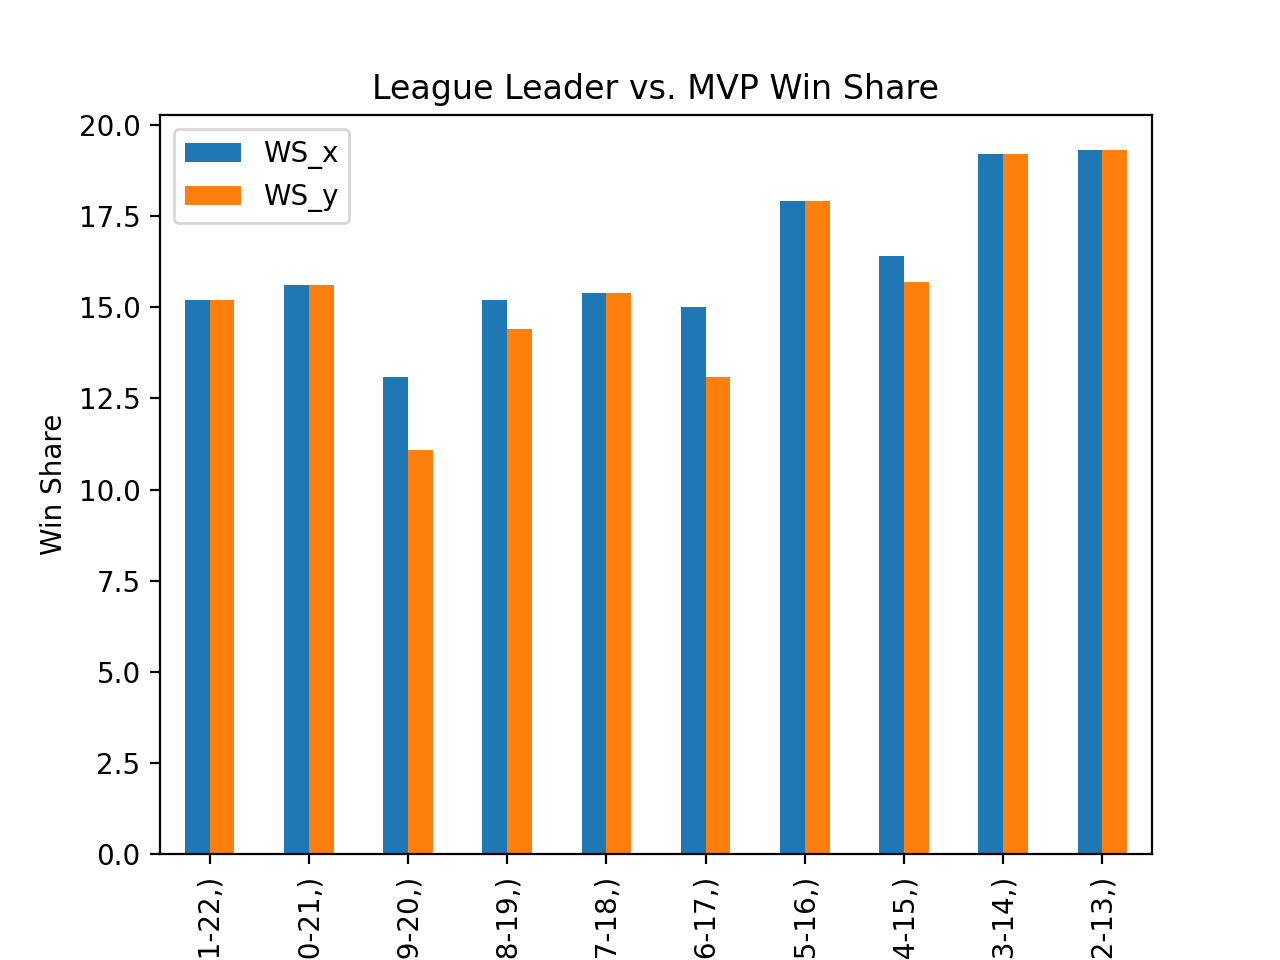

Text(0.5, 1.0, 'League Leader vs. MVP Win Share')

Text(0.5, 0, 'Season')

Text(0, 0.5, 'Win Share')

In [46]:
ax10 = leaders_mvps[["WS_x","WS_y"]].plot.bar()
ax10.set_title("League Leader vs. MVP Win Share")
ax10.set_xlabel("Season")
ax10.set_ylabel("Win Share")

<IPython.core.display.Javascript object>


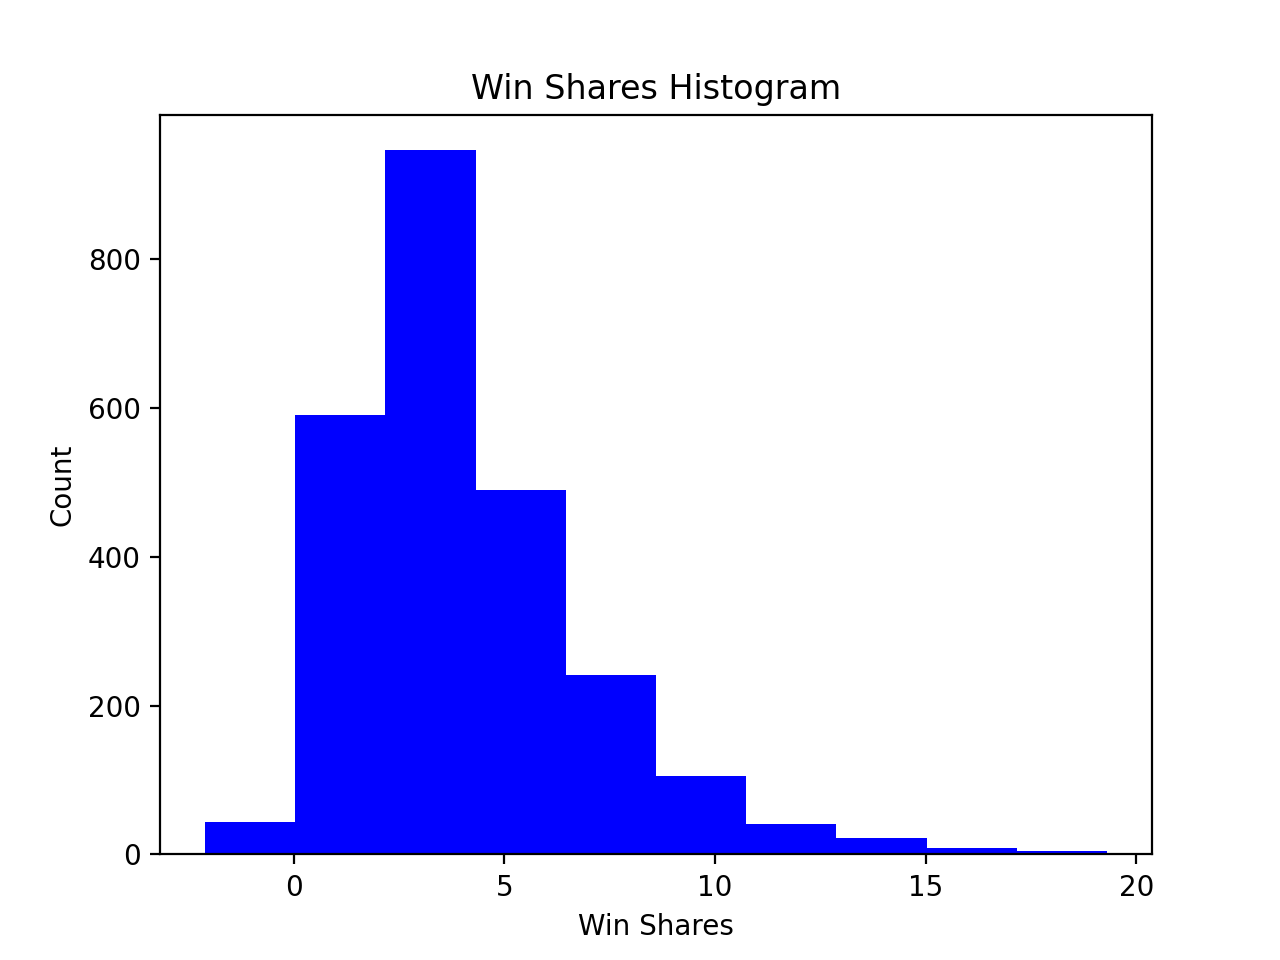

(array([ 44., 591., 946., 490., 241., 105.,  41.,  22.,   8.,   4.]),
 array([-2.1 ,  0.04,  2.18,  4.32,  6.46,  8.6 , 10.74, 12.88, 15.02,
        17.16, 19.3 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Win Shares Histogram')

Text(0.5, 0, 'Win Shares')

Text(0, 0.5, 'Count')

In [29]:
# histogram of whin shares in the NBA
fig = plt.figure()
ax3 = fig.add_subplot(1,1,1,)
ax3.hist(stat_table.WS, color = "b")
ax3.set_title("Win Shares Histogram")
ax3.set_xlabel("Win Shares")
ax3.set_ylabel("Count")

In [48]:
# Average WS - League Leaders vs. NBA
ws_table.WS.mean()
stat_table.WS.mean()

16.23

4.071508828250405

In [45]:
# stats in the formula for win shares 
data_1 = stat_table[["Player","Season","WS","PTS","TRB","AST","STL","BLK"]]
data_1

Player   Season    WS   PTS   TRB  AST  STL  BLK
0               Joel Embiid  2021-22  12.0  30.6  11.7  4.2  1.1  1.5
1     Giannis Antetokounmpo  2021-22  12.9  29.9  11.6  5.8  1.1  1.4
2               Luka Dončić  2021-22   7.6  28.4   9.1  8.7  1.2  0.6
3                Trae Young  2021-22  10.0  28.4   3.7  9.7  0.9  0.1
4             DeMar DeRozan  2021-22   8.8  27.9   5.2  4.9  0.9  0.3
...                     ...      ...   ...   ...   ...  ...  ...  ...
2487         Pablo Prigioni  2012-13   3.2   3.5   1.8  3.0  0.9  0.0
2488          Dahntay Jones  2012-13   0.6   3.4   1.3  0.6  0.3  0.1
2489         Draymond Green  2012-13   0.6   2.9   3.3  0.7  0.5  0.3
2490            Chuck Hayes  2012-13   1.5   2.7   4.0  1.5  0.4  0.2
2491           Festus Ezeli  2012-13   1.5   2.4   4.0  0.3  0.3  0.9

[2492 rows x 8 columns]

index                 Player   Season    WS   PTS   TRB  AST  STL  BLK
0         0            Joel Embiid  2021-22  12.0  30.6  11.7  4.2  1.1  1.5
1         1  Giannis Antetokounmpo  2021-22  12.9  29.9  11.6  5.8  1.1  1.4
2         2            Luka Dončić  2021-22   7.6  28.4   9.1  8.7  1.2  0.6
3         3             Trae Young  2021-22  10.0  28.4   3.7  9.7  0.9  0.1
4         4          DeMar DeRozan  2021-22   8.8  27.9   5.2  4.9  0.9  0.3
...     ...                    ...      ...   ...   ...   ...  ...  ...  ...
2487   2487         Pablo Prigioni  2012-13   3.2   3.5   1.8  3.0  0.9  0.0
2488   2488          Dahntay Jones  2012-13   0.6   3.4   1.3  0.6  0.3  0.1
2489   2489         Draymond Green  2012-13   0.6   2.9   3.3  0.7  0.5  0.3
2490   2490            Chuck Hayes  2012-13   1.5   2.7   4.0  1.5  0.4  0.2
2491   2491           Festus Ezeli  2012-13   1.5   2.4   4.0  0.3  0.3  0.9

[2492 rows x 9 columns]

<IPython.core.display.Javascript object>


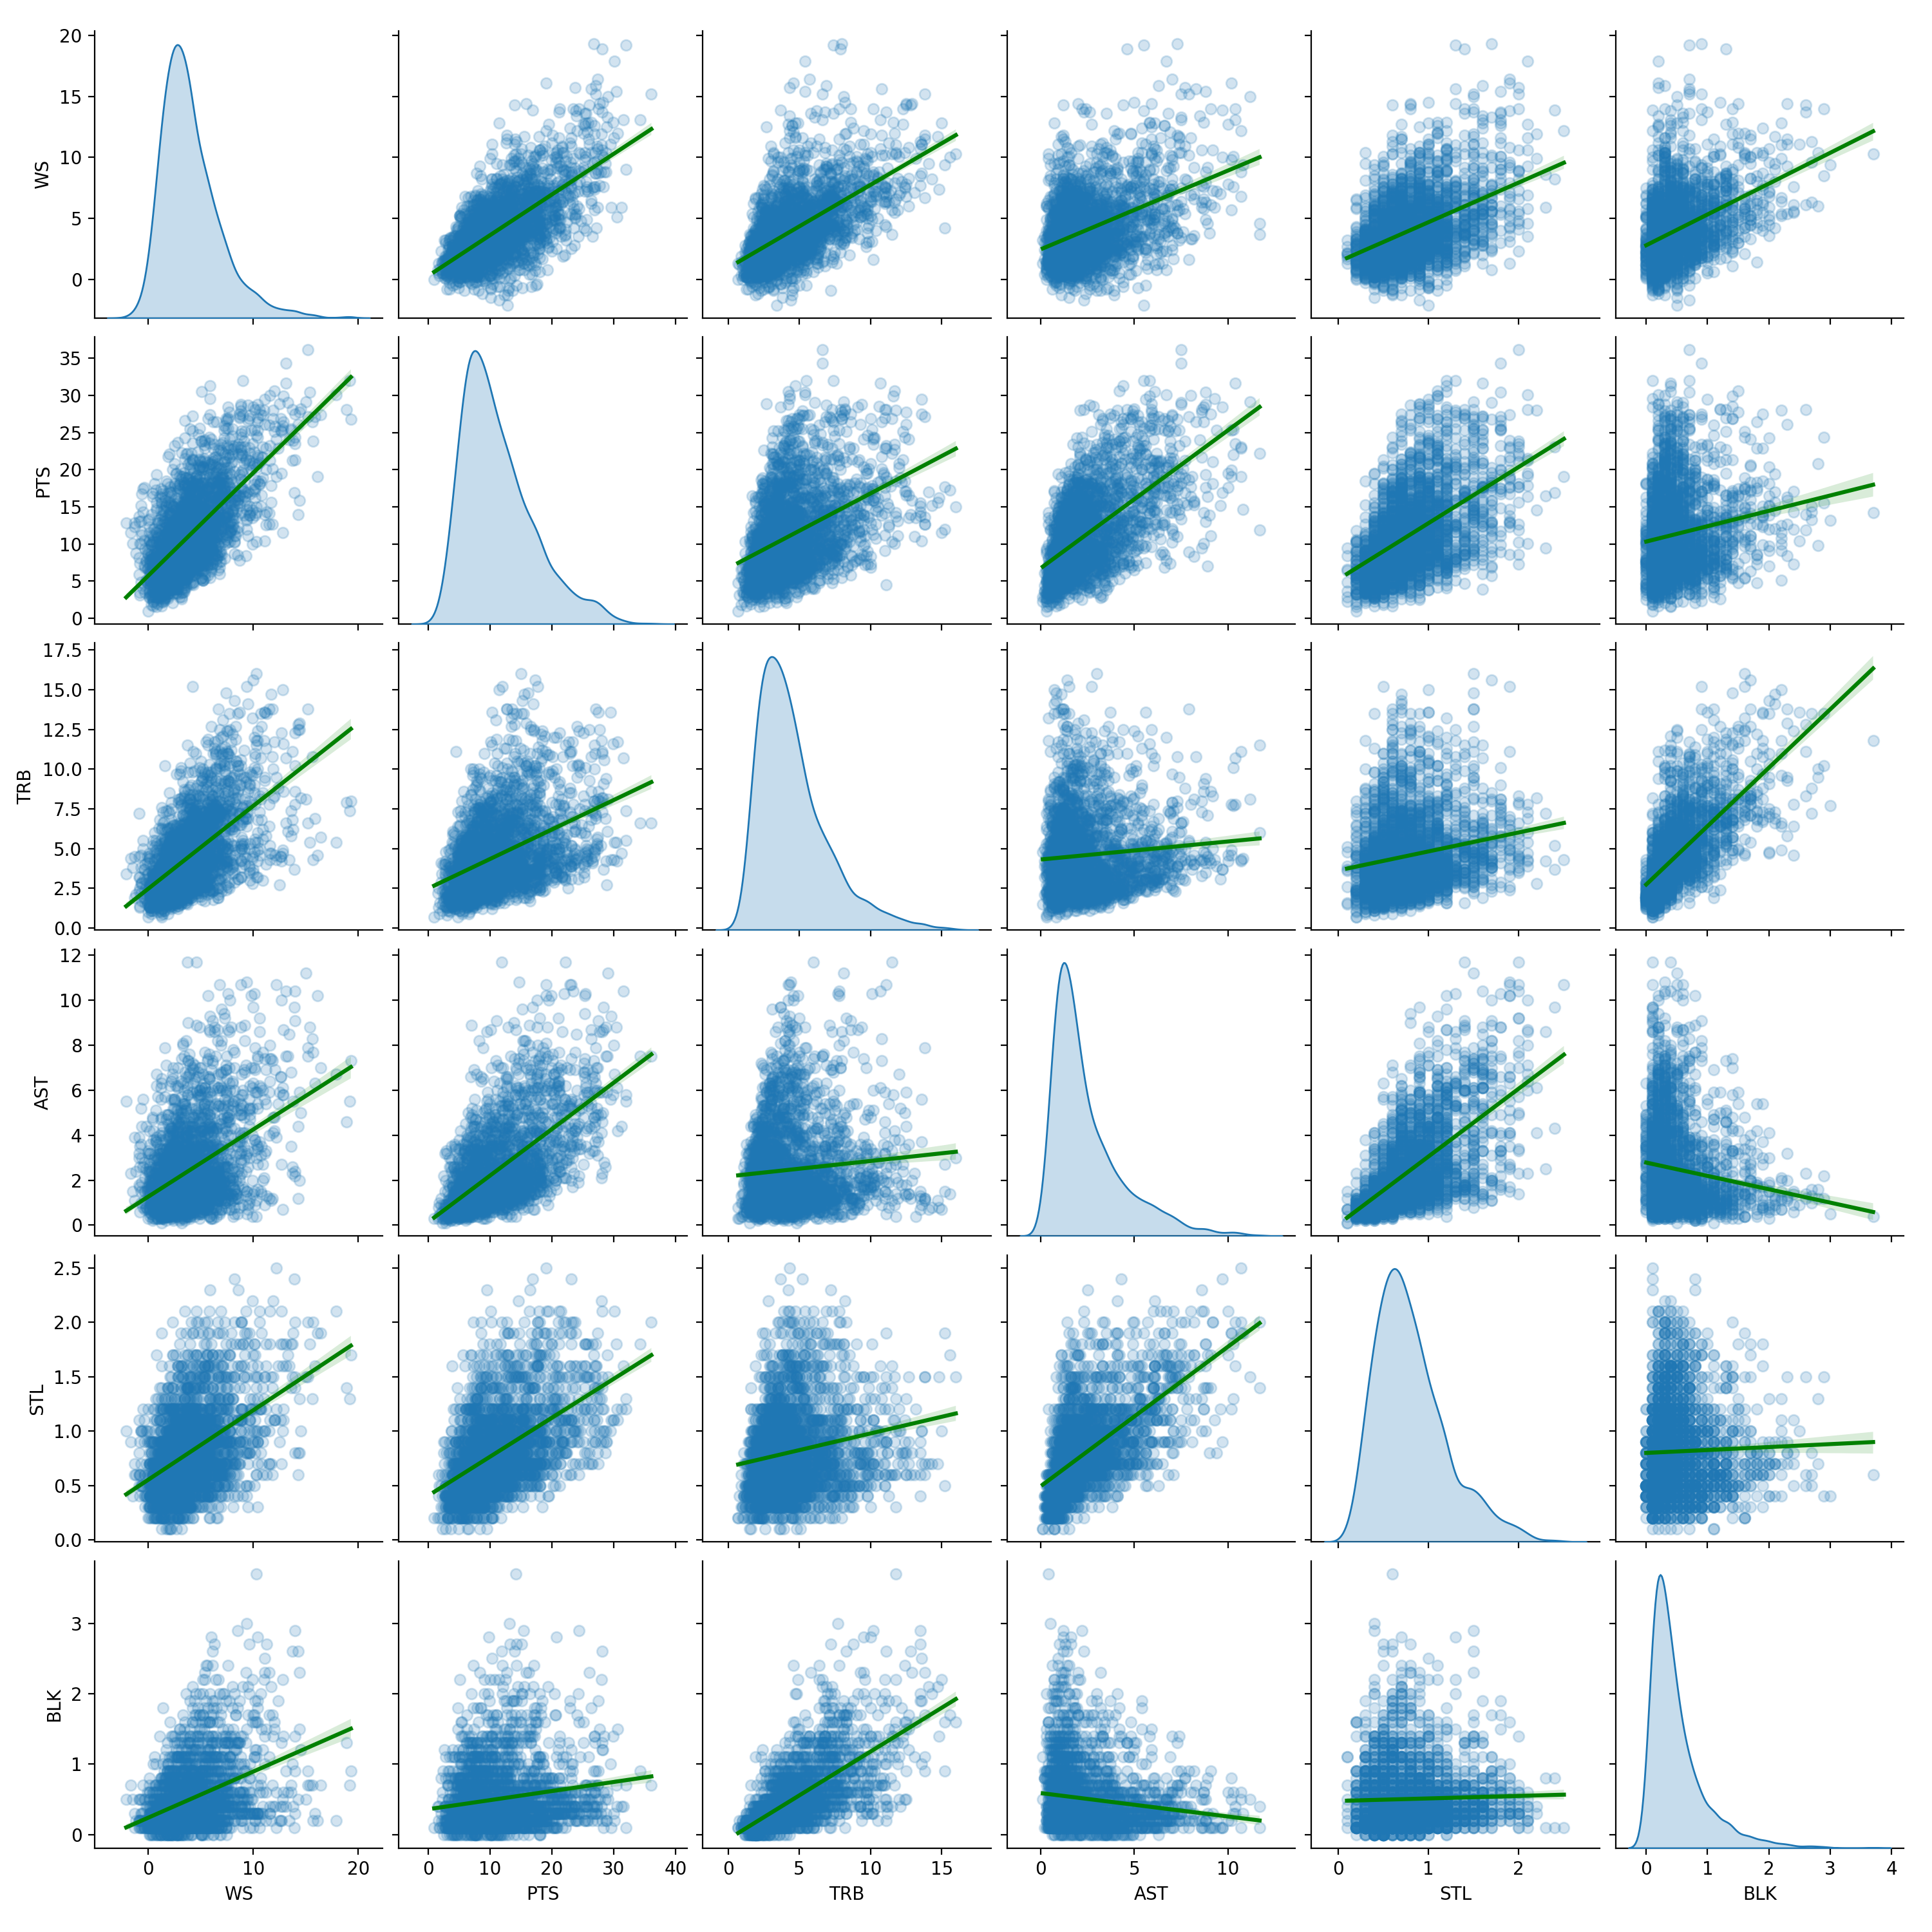

In [32]:
# scatter matrix of filtered data 
data_1.reset_index()
scatter_matrix = sns.pairplot(data_1, diag_kind = "kde", kind = "reg",
                              plot_kws = {"line_kws": {"color": "green"},"scatter_kws":{"alpha":0.2}})

<IPython.core.display.Javascript object>


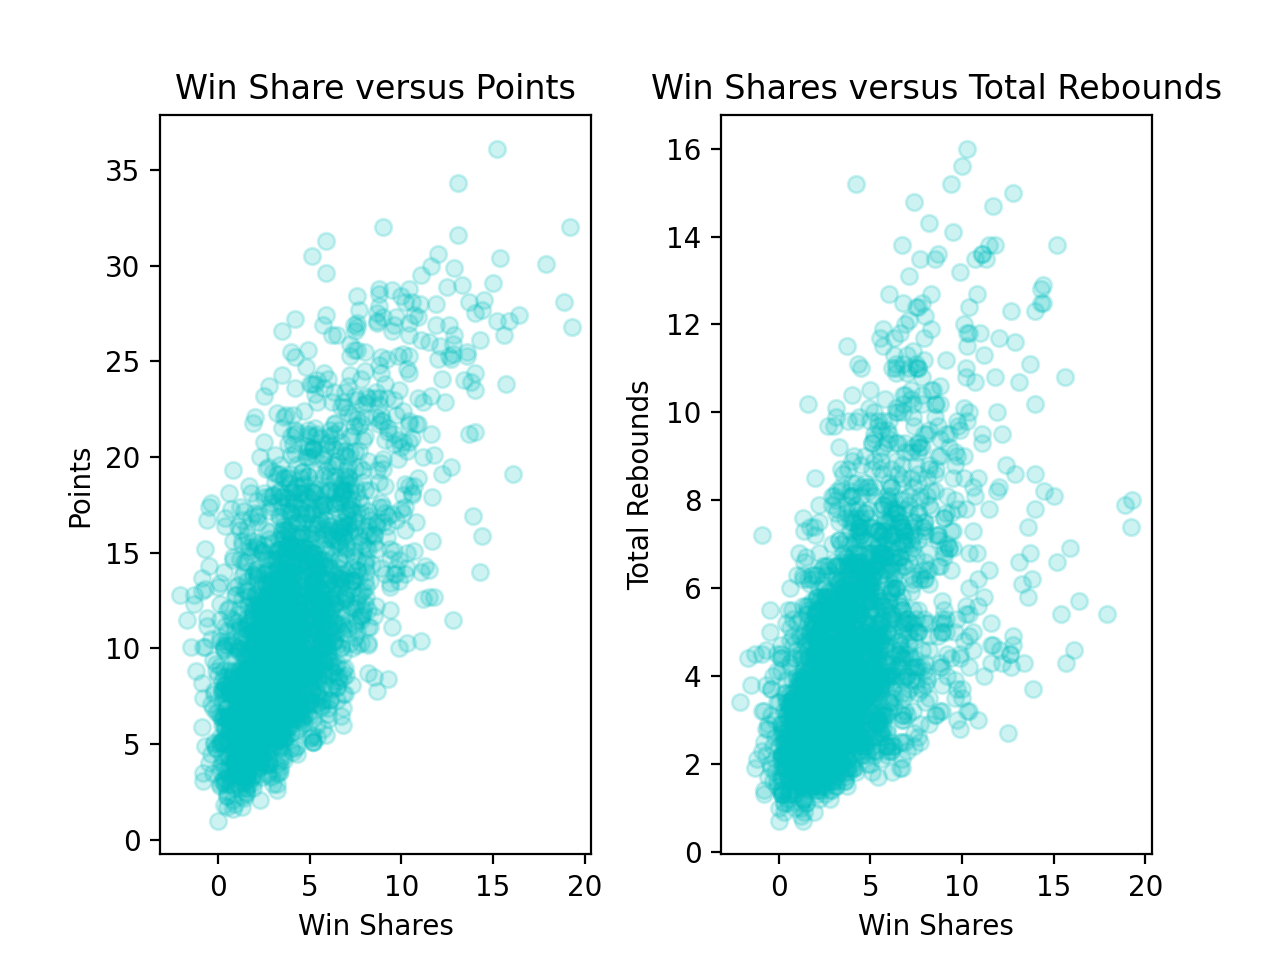

Text(0.5, 1.0, 'Win Share versus Points')

Text(0.5, 0, 'Win Shares')

Text(0, 0.5, 'Points')

Text(0.5, 1.0, 'Win Shares versus Total Rebounds')

Text(0.5, 0, 'Win Shares')

Text(0, 0.5, 'Total Rebounds')

In [33]:
# two most influential stats 
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax.scatter(data_1.WS,data_1.PTS, color = "c", alpha = 0.2)
ax.set_title("Win Share versus Points")
ax.set_xlabel("Win Shares")
ax.set_ylabel("Points")
ax2.scatter(data_1.WS,data_1.TRB, color = "c", alpha = 0.2)
ax2.set_title("Win Shares versus Total Rebounds")
ax2.set_xlabel("Win Shares")
ax2.set_ylabel("Total Rebounds")
fig.subplots_adjust(wspace=.3, hspace=.3)

<IPython.core.display.Javascript object>


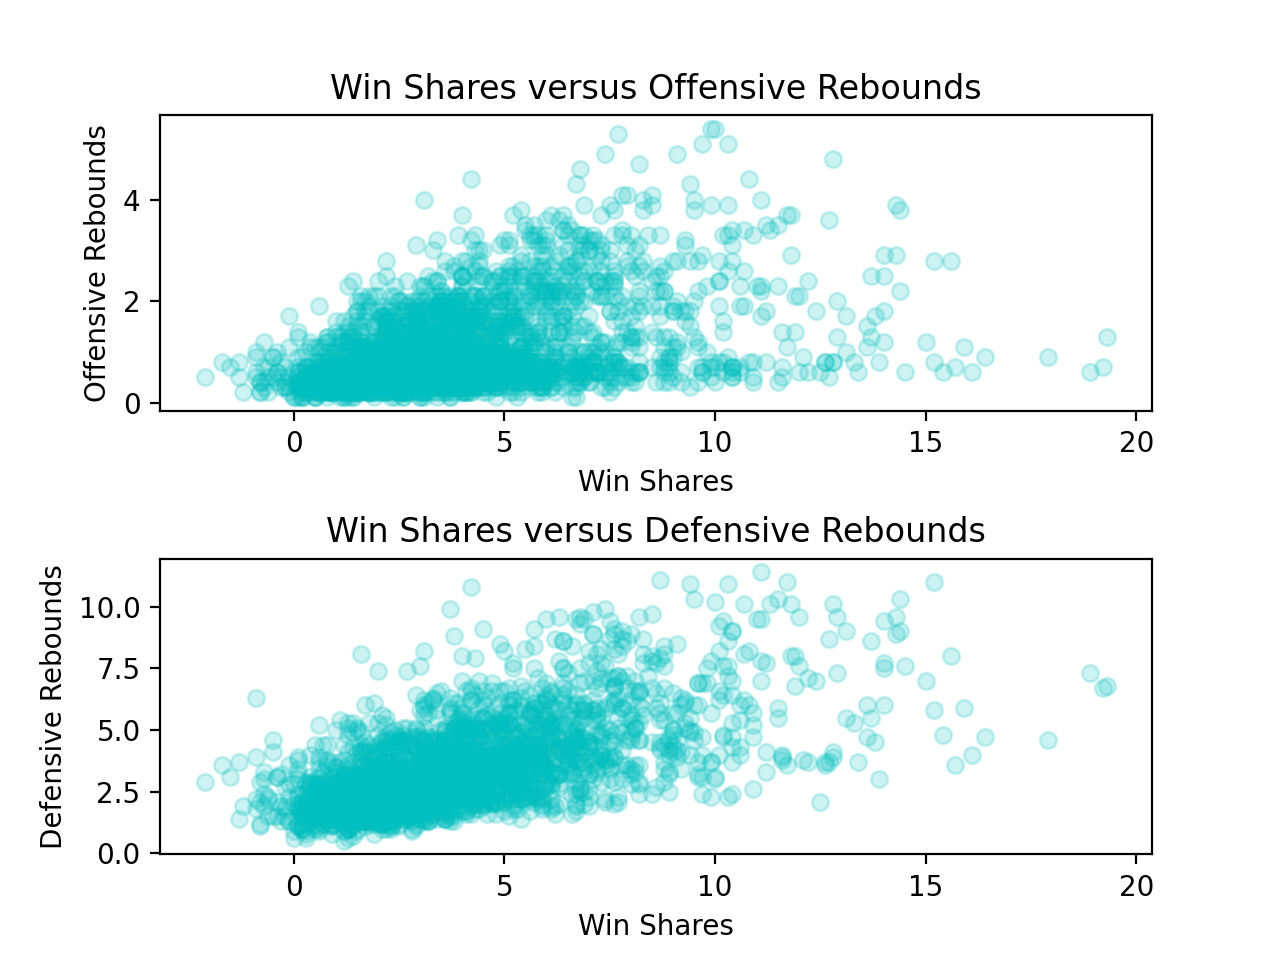

Text(0.5, 1.0, 'Win Shares versus Offensive Rebounds')

Text(0.5, 1.0, 'Win Shares versus Defensive Rebounds')

Text(0.5, 0, 'Win Shares')

Text(0.5, 0, 'Win Shares')

Text(0, 0.5, 'Offensive Rebounds')

Text(0, 0.5, 'Defensive Rebounds')

In [35]:
# offensive vs. defensive rebounds
fig = plt.figure()
ax4 = fig.add_subplot(2,1,1)
ax5 = fig.add_subplot(2,1,2)
ax4.scatter(stat_table.WS,stat_table.ORB, color = "c", alpha = 0.2)
ax5.scatter(stat_table.WS,stat_table.DRB, color = "c", alpha = 0.2)
ax4.set_title("Win Shares versus Offensive Rebounds")
ax5.set_title("Win Shares versus Defensive Rebounds")
ax4.set_xlabel("Win Shares")
ax5.set_xlabel("Win Shares")
ax4.set_ylabel("Offensive Rebounds")
ax5.set_ylabel("Defensive Rebounds")
fig.subplots_adjust(wspace=.3, hspace= .5)

In [52]:
# Average Rebounds - League Leaders vs. NBA
ws_table.ORB.mean()
ws_table.DRB.mean()
stat_table.ORB.mean()
stat_table.DRB.mean()

1.3

6.49

1.0793338683788158

3.521388443017655

In [49]:
# Average Points - League Leaders vs. NBA
ws_table.PTS.mean()
stat_table.PTS.mean()

29.97

11.376765650080255

In [53]:
# high win share is attained by being able to score and collect rebounds